# Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df = pd.read_csv("datas/fcc-forum-pageviews.csv",index_col=['date'])
df.sort_values('value', inplace=True)

In [3]:
low_df = int(df.shape[0]*0.025)
high_df = int(df.shape[0]*0.975)
df = df[low_df+1:high_df]

In [4]:
df = df.sort_index()
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


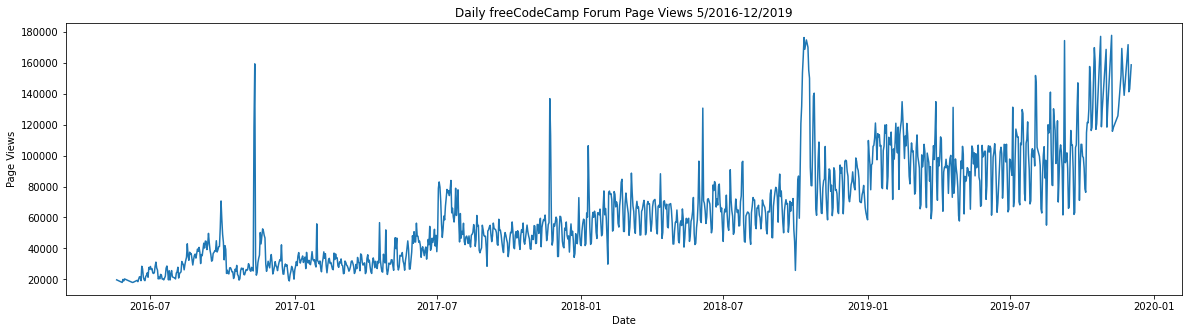

In [5]:
#first way to plot
df.index = pd.to_datetime(df.index).date
fig, ax = plt.subplots(figsize=(20, 5))

ax = plt.plot(df)
plt.legend([], frameon=False)

plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

plt.show()

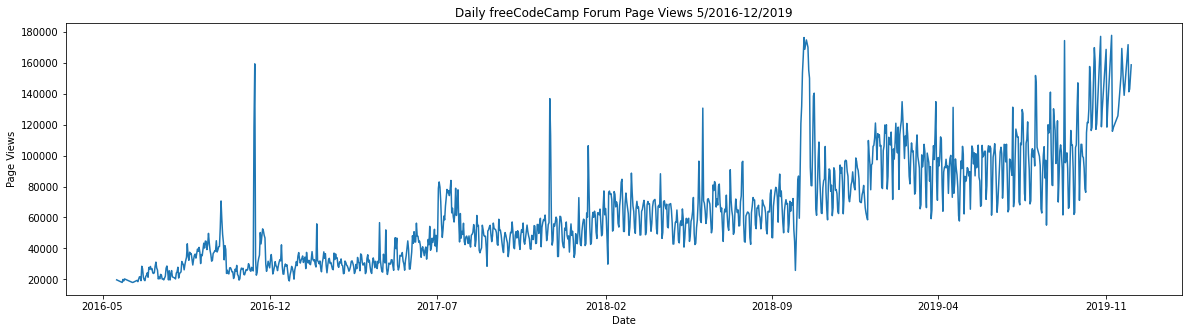

In [6]:
#second way to plot
df.index = pd.to_datetime(df.index).date
ax = df.plot(figsize=(20,5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend([], frameon=False)

plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

plt.show()


In [7]:
df2 = df.copy()
df2['Year'] = (pd.DatetimeIndex(df2.index).year)
df2['Month'] = (pd.DatetimeIndex(df2.index).month)

df2.sort_values('Month',inplace=True)

In [8]:
df2.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                 7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},
                 inplace=True)

df2

,value,Year,Month
2017-01-06,37353,2017,January
2019-01-06,94108,2019,January
2019-01-05,77897,2019,January
2019-01-04,94514,2019,January
2019-01-03,100710,2019,January
...,...,...,...
2017-12-29,72819,2017,December
2017-12-28,51018,2017,December
2017-12-27,43075,2017,December
2016-12-28,28424,2016,December


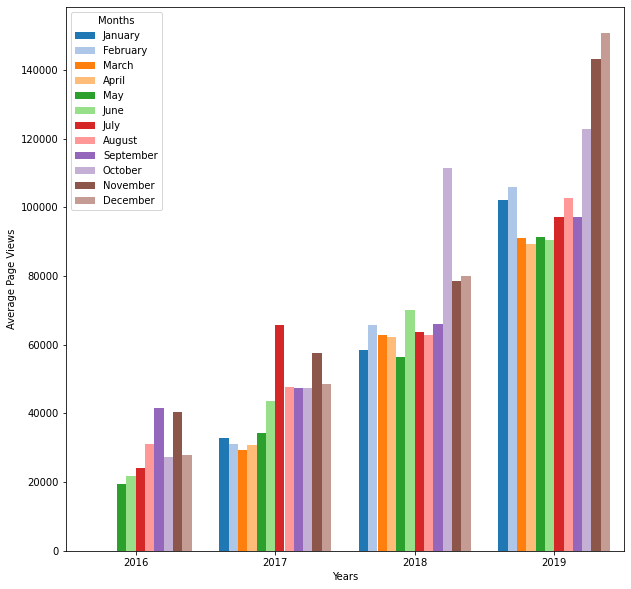

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df2,x='Year',y='value',hue='Month',
            palette='tab20',saturation=1,ci=None)

plt.legend(title='Months',loc=2)

plt.xlabel('Years')
plt.ylabel('Average Page Views')

plt.show()

In [10]:
month = ['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

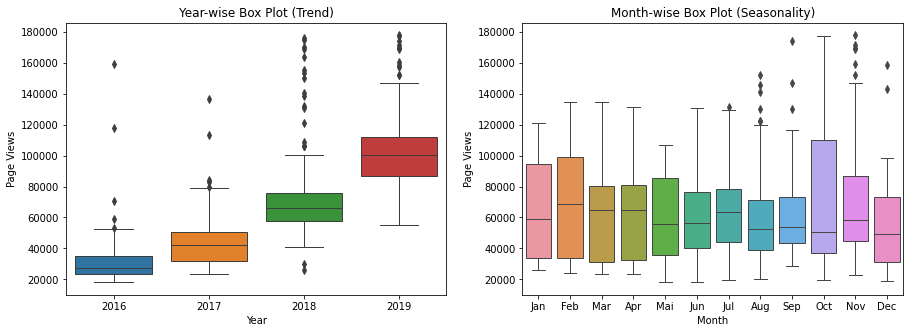

In [11]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5),)
sns.boxplot(data=df2,x='Year',y='value', linewidth=1, ax=axes[0])
sns.boxplot(data=df2,x='Month',y='value', linewidth=1, ax=axes[1])

axes[0].set_ylabel('Page Views')
axes[1].set_ylabel('Page Views')
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xticks(labels=month,ticks=range(12))

plt.show()